In [51]:
from ego_solver import EGO
import numpy as np
# from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
%matplotlib inline

In [52]:
file_address = 'solution_obj_name_branin_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

In [53]:
solution = np.array(dat['solution'])

In [54]:
num_ini_guess = 5
bounds = np.array([[-5, 10], [0, 15]])

solution_X = solution[0,1,0] # test sigma = 0.1
solution_y = solution[0,1,1]
from estimate_sigma import CovarianceEstimate
ce = CovarianceEstimate(solution_X, solution_y, bounds, num_ini_guess)
sig_scale = np.array([0.01, 0.1, 1., 10.])
alpha_set = np.array([0.01, 0.1, 1., 10., 100.])
grid_result = np.zeros((sig_scale.shape[0], alpha_set.shape[0]))
for i, s in enumerate(sig_scale):
    sig_inv = np.ones(2)*s
    for j, alpha in enumerate(alpha_set):
#         print j
        grid_result[i,j] = ce.model.obj(sig_inv, alpha)

wait = 1

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


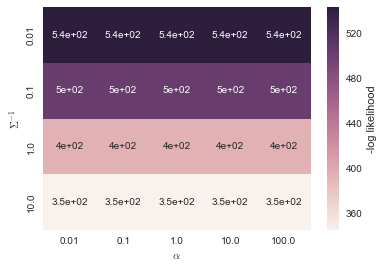

In [55]:
f = plt.figure()
sns.heatmap(-grid_result,
            xticklabels=alpha_set, yticklabels=sig_scale, 
           robust=True, annot=True)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Sigma^{-1}$')
cbar_ax = f.axes[-1]
cbar_ax.set_ylabel('-log likelihood')

In [41]:
solution.shape

(30L, 4L, 2L)